<a href="https://colab.research.google.com/github/aushley/CC19-Phase-3/blob/main/CC19_Phase_3_Objective_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.6.1


Saving Maternal Health Risk Data Set - Cleaned.xlsx to Maternal Health Risk Data Set - Cleaned.xlsx
   Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate RiskLevel  \
0   10          70           50  6.9      98.0         70  low risk   
1   10          85           65  6.9      98.0         70  low risk   
2   10         100           50  6.0      99.0         70  mid risk   
3   12          95           60  6.1     102.0         60  low risk   
4   12          95           60  7.2      98.0         77  low risk   

   High Risk  Unnamed: 8 Unnamed: 9        Unnamed: 10  Unnamed: 11  \
0          0         NaN        NaN                NaN          NaN   
1          0         NaN        NaN                NaN          NaN   
2          0         NaN        NaN     Number of rows          NaN   
3          0         NaN        NaN                460          NaN   
4          0         NaN        NaN  Number of columns          NaN   

   Unnamed: 12 NUMERICAL  Unnamed: 14  Unnamed

<ipython-input-1-3878830b27c4>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', data=df, palette='coolwarm')


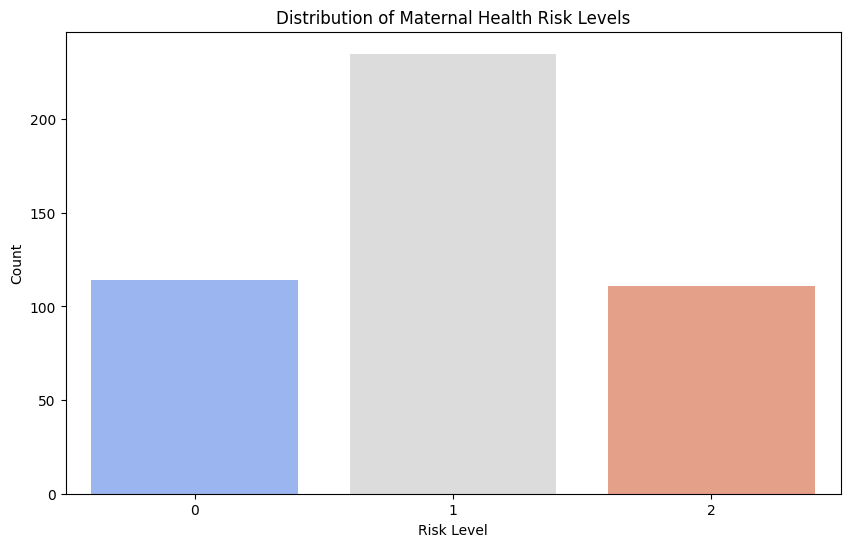

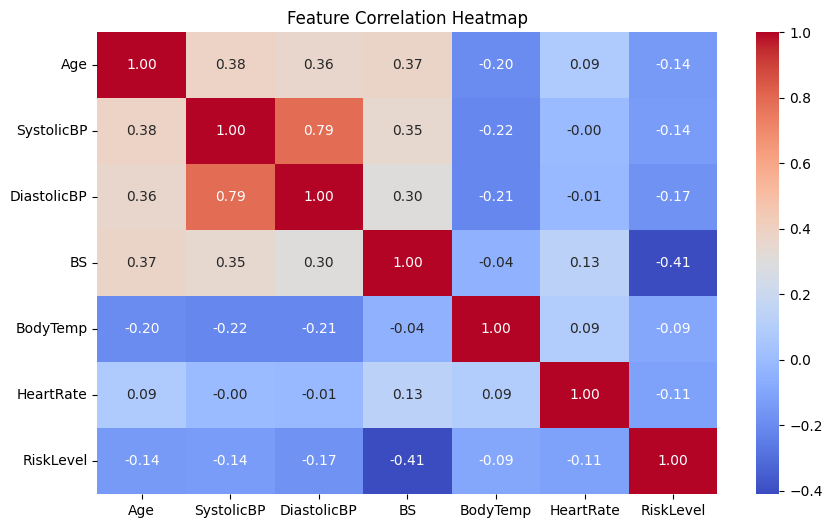

Accuracy: 57.61
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        16
           1       0.67      0.80      0.73        45
           2       0.41      0.23      0.29        31

    accuracy                           0.58        92
   macro avg       0.52      0.55      0.52        92
weighted avg       0.55      0.58      0.55        92

       Feature  Importance
3           BS    0.349893
1   SystolicBP    0.171974
0          Age    0.160773
2  DiastolicBP    0.122816
5    HeartRate    0.113566
4     BodyTemp    0.080977


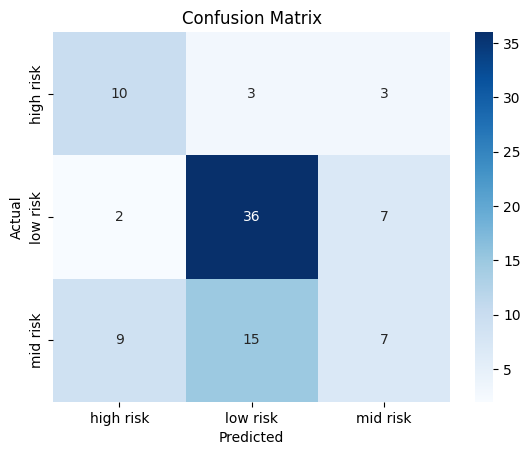

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import sklearn

# Print sklearn version
print(sklearn.__version__)

from google.colab import files
uploaded = files.upload()

# Load dataset (Replace 'maternal_health_risk.csv' with your actual dataset file)
df = pd.read_excel("Maternal Health Risk Data Set - Cleaned.xlsx")
print(df.head())  # Display the first few rows

# Keep only relevant columns
df = df.iloc[:, :7]

# Drop rows with missing values
df = df.dropna()

# Encode the target variable
label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='RiskLevel', data=df, palette='coolwarm')
plt.title('Distribution of Maternal Health Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Split data into features and target
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}')
print(classification_report(y_test, y_pred))

# Feature Importance Analysis
feature_importance = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
print(importance_df.sort_values(by="Importance", ascending=False))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
